# 🤖 Use Pre-trained CNN Models to Identify MPox

Here, we are going to use a few pre-trained CNN models to identify MPox from other dermatological diseases. The dataset we are using has the following sets of images.

- Actinic keratoses
- Basal cell carcinoma
- Benign keratosis-like lesions
- Chickenpox
- Cowpox
- Dermatofibroma
- Healthy
- HFMD
- Measles
- Melanocytic nevi
- Melanoma
- Monkeypox
- Squamous cell carcinoma
- Vascular lesions

We are going to use the following pre-trained CNN models to identify MPox.

- ***Resnet50V2***
  - ResNet50V2 is an improved version of the ResNet50 deep convolutional neural network architecture, designed with batch normalization before activation functions and identity mapping to enhance training stability and performance for image recognition tasks.<br><br>
- ***InceptionResNetV2***
  - The InceptionResNetV2 model is a deep convolutional neural network that combines the Inception architecture’s efficiency in feature extraction with the ResNet framework’s skip connections, enabling faster training and improved performance for image recognition tasks.<br><br>
- ***Xception***
  - The Xception model is a deep convolutional neural network architecture that improves performance by using depthwise separable convolutions, optimizing both accuracy and computational efficiency and is an extension of the Inception architecture.<br><br>
- ***VGG16***
  - VGG16 is a deep convolutional neural network architecture with 16 layers, known for its simplicity and uniform structure, using small 3x3 convolutional filters for feature extraction and achieving strong performance in image recognition tasks.<br><br>
- ***VGG19***
  - VGG19 is a deep convolutional neural network architecture with 19 layers, similar to VGG16, but with additional convolutional layers, designed to extract detailed features using small 3x3 filters for image recognition tasks.<br><br>
- ***MobileNetV2***
  - MobileNetV2 is a lightweight convolutional neural network architecture optimized for mobile and embedded devices, featuring depthwise separable convolutions and an innovative inverted residual structure with linear bottlenecks for efficient feature extraction.

## 🗂️ Import Libraries

The following code block imports all the libraries that are necessary for our development purposes.

#### 🔢 `numpy`
- NumPy is a powerful Python library used for numerical computing, providing support for large, multi-dimensional arrays, matrices, and high-level mathematical functions to operate on them efficiently.

#### 🐼 `pandas`
- Pandas is a Python library designed for data manipulation and analysis, offering easy-to-use data structures like DataFrames and Series for handling structured data efficiently.

#### 👣 `pathlib`
- Pathlib is a Python library that provides an object-oriented interface for working with filesystem paths, making path manipulation and file operations more intuitive and cross-platform.

#### 📈 `matplotlib`
- Matplotlib is a Python library for creating static, interactive, and animated visualizations in a variety of formats, including plots, graphs, and charts.

#### ⚡ `tensorflow`
- TensorFlow is an open-source library designed for building and deploying machine learning and deep learning models, offering a flexible ecosystem for numerical computation and AI development.

#### 🧠 `keras`
- Keras is a high-level deep learning library in Python that simplifies the creation and training of neural networks by providing an intuitive interface to underlying frameworks like TensorFlow.

#### 🌊 `seaborn`
- Seaborn is a Python library built on Matplotlib that simplifies creating aesthetically pleasing and informative statistical graphics for data visualization.

#### 💻 `os`
- The os library in Python provides a way to interact with the operating system, enabling tasks such as file and directory manipulation, environment variable access, and process management.

#### 🔬 `scikit-learn`
- Scikit-learn is a Python library that provides simple and efficient tools for data mining, data analysis, and machine learning, including classification, regression, and clustering algorithms.

#### 📄 `shutil`
- The shutil library in Python provides a suite of functions for high-level file operations, including copying, moving, renaming, and deleting files and directories.

### 🎲 `random`
- The random library in Python provides functions to generate random numbers, select random elements, and perform random operations like shuffling and sampling, useful for simulations, games, and probabilistic programming.

In [1]:
## 🗂️ Import Libraries

import numpy as np
import pandas as pd
from pathlib import Path
import os
import random
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.cm as cm
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
import shutil

## ♾️ Constants

While proceeding with the process, we need some constants that may refer to the directory paths, image category names, data generation properties, etc.

In [2]:
## ♾️ Constants

### Directory Paths
DATA_PATH = './data/original'
AUGMENTED_PATH = './data/augmented'
CNN_BALANCED_PATH = './data/cnn_original_balanced'
CNN_PROCESSING_PATH = './data/cnn_original_processing'

TRAIN_DIRECTORY = 'train'
TEST_DIRECTORY = 'test'
VALIDATION_DIRECTORY = 'val'

### Sample Values
TRAIN_DATASET_SAMPLE_COUNT = 1000

### Directories containing the images
SUB_DIRECTORIES = [TRAIN_DIRECTORY, TEST_DIRECTORY, VALIDATION_DIRECTORY]
DATA_DIRECTORIES = ['Actinic keratoses', 'Basal cell carcinoma', 'Benign keratosis-like lesions', 'Chickenpox', 'Cowpox', 'Dermatofibroma', 'Healthy', 'HFMD', 'Measles', 'Melanocytic nevi', 'Melanoma', 'Monkeypox', 'Squamous cell carcinoma', 'Vascular lesions']

### Data generation properties
ROTATION_RANGE = 40
WIDTH_SHIFT_RANGE = 0.2
HEIGHT_SHIFT_RANGE = 0.2
SHEAR_RANGE = 0.2
ZOOM_RANGE = 0.2
HORIZONTAL_FLIP = True
FILL_MODE = 'nearest'

## 🧮 Get Number of Images

Get the number of images in each directory and sub-directory to get an understanding of the dataset.

In [44]:
## 🧮 Get Number of Images
### This method is used to get the number of images in each of the directories in our dataset

def count_images(dir_name):
    for dataset_type in SUB_DIRECTORIES:
        dir_type = os.path.join(dir_name, dataset_type)
        print(f"{dataset_type}")
        print("----------------------------")
        for category in os.listdir(dir_type):
            category_path = os.path.join(dir_type, category)
            if not os.path.isdir(category_path):
                continue
            images = [img for img in os.listdir(category_path) if img.endswith(('jpg', 'jpeg'))]
            print(f"Number of images in {category_path.split('/')[-1]}: {len(images)}")
        print("")

In [45]:
### Execute the method

count_images(DATA_PATH)

train
----------------------------
Number of images in Benign keratosis-like lesions: 2099
Number of images in Cowpox: 792
Number of images in Healthy: 1368
Number of images in Actinic keratoses: 693
Number of images in Melanoma: 3617
Number of images in HFMD: 1932
Number of images in Melanocytic nevi: 10300
Number of images in Measles: 660
Number of images in Chickenpox: 900
Number of images in Basal cell carcinoma: 2658
Number of images in Squamous cell carcinoma: 502
Number of images in Monkeypox: 3408
Number of images in Dermatofibroma: 191
Number of images in Vascular lesions: 202

test
----------------------------
Number of images in Benign keratosis-like lesions: 263
Number of images in Cowpox: 99
Number of images in Healthy: 171
Number of images in Actinic keratoses: 88
Number of images in Melanoma: 453
Number of images in HFMD: 242
Number of images in Melanocytic nevi: 1288
Number of images in Measles: 83
Number of images in Chickenpox: 113
Number of images in Basal cell carci

## 🗜️ Image Augmentation for Categories with Low Image Count

Since the image count is low on the following we need to augment those images. Then, we can add the original images and a set of augmented images for our model creation.

***train*** Dataset (<1000)
- *Cowpox*
- *Actinic keratoses*
- *Measels*
- *Chickenpox*
- *Squamous cell carcinoma*
- *Dermatofibroma*
- *Vascular lesions*

***test*** Dataset (<200)
- *Cowpox*
- *Healthy*
- *Actinic keratoses*
- *Measels*
- *Chickenpox*
- *Squamous cell carcinoma*
- *Dermatofibroma*
- *Vascular lesions*

***val*** Dataset (<200)
- *Cowpox*
- *Healthy*
- *Actinic keratoses*
- *Measels*
- *Chickenpox*
- *Squamous cell carcinoma*
- *Dermatofibroma*
- *Vascular lesions*

### 💾 Define Data Generation Properties
To augment images we need to use something called `ImageDataGenerator`. To use that we need to define data-gen properties. This way more data is generated according to the parameters we define. The parameters we will be using for this are as follows.

- ↻ `rotation_range`
    - Specifies the range(in degrees) within which the image is randomly rotated.
    - For example, a value of `40` means the image can be rotated randomly by up to `40` degrees in either direction(clockwise or counterclockwise).<br><br>
    
- ↔ `width_shift_range`
    - Specifies the fraction of the total width of the image by which it can be randomly shifted horizontally.
    - For example, a value of `0.2` allows a horizontal shift of up to `20%` of the image's width.<br><br>
    
- ↕ `height_shift_range`
    - Specifies the fraction of the total height of the image by which it can be randomly shifted vertically.
    - For example, a value of `0.2` allows a vertical shift of up to `20%` of the image's height.<br><br>
  
- ➤ `shear_range`
    - Specifies the intensity of shear transformation as a shear angle in a counterclockwise direction in degrees.
    - A shear transformation distorts the image along an axis creating a parallelogram effect.<br><br>

- 🔎 `zoom_range`
   - Specifies the range for random zoom. It can zoom in or out within this range.
   - For example, a value of `0.2` means the image size can be varied randomly by up to `±20%`.<br><br>

- ― `horizontal_flip`
   - Specifies whether the image should be flipped horizontally.
   - If `True`, the image is randomly flipped along the horizontal axis, mirroring it.<br><br>

- 🚰 `fill_mode`
   - Specifies the strategy for filling in pixels that are introduced during transformations.
   - The value `nearest` means the nearest pixel values are used to fill these gaps.

In [ ]:
## 🗜️ Image Augmentation for Categories with Low Image Count

### Define directories that lacks the images
TRAIN_IMAGE_AUGEMENTATION_DIRS = ['Cowpox', 'Actinic keratoses', 'Measles', 'Chickenpox', 'Squamous cell carcinoma', 'Dermatofibroma', 'Vascular lesions']
TEST_IMAGE_AUGEMENTATION_DIRS = ['Cowpox', 'Healthy', 'Actinic keratoses', 'Measles', 'Chickenpox', 'Squamous cell carcinoma', 'Dermatofibroma', 'Vascular lesions']
VAL_IMAGE_AUGEMENTATION_DIRS = ['Cowpox', 'Healthy', 'Actinic keratoses', 'Measles', 'Chickenpox', 'Squamous cell carcinoma', 'Dermatofibroma', 'Vascular lesions']

### Create Image Generator
datagen = ImageDataGenerator(
    rotation_range=ROTATION_RANGE,
    width_shift_range=WIDTH_SHIFT_RANGE,
    height_shift_range=HEIGHT_SHIFT_RANGE,
    shear_range=SHEAR_RANGE,
    zoom_range=ZOOM_RANGE,
    horizontal_flip=HORIZONTAL_FLIP,
    fill_mode=FILL_MODE)

### Function to process and augment data
def augment_and_copy_data(dir_name):
    for dataset_type in SUB_DIRECTORIES:
        dir_type = os.path.join(dir_name, dataset_type)
        categories = []
        if dataset_type == TRAIN_DIRECTORY:
            categories = TRAIN_IMAGE_AUGEMENTATION_DIRS
        elif dataset_type == TEST_DIRECTORY:
            categories = TEST_IMAGE_AUGEMENTATION_DIRS
        else:
            categories = VAL_IMAGE_AUGEMENTATION_DIRS
        for category in categories:
            category_path = os.path.join(dataset_type, category)
            ### Get augmented dataset path (e.g. ./data/augmented/train)
            augmented_path = os.path.join(AUGMENTED_PATH, dataset_type)
            ### Create the dataset type directory if it does not exist
            os.makedirs(augmented_path, exist_ok=True)
            ### Get augmented category path (e.g. ./data/augmented/train/Cowpox)
            augmented_category_path = os.path.join(augmented_path, category)
            ### Create a directory if it does not exist
            os.makedirs(augmented_category_path, exist_ok=True)

            ### Get all the files inside a category directory
            files = os.listdir(category_path)

            ### Iterate files
            for file in files:
                if file.startswith('.'): ### Skip hidden files
                    continue
                ### Load images
                img_path = os.path.join(category_path, file)
                img = load_img(str(img_path))
                x = img_to_array(img) ### This is a NumPy array with shape (3, 150, 150)
                x = x.reshape((1,) + x.shape) ### This is a NumPy array with shape (1, 3, 150, 150)
                ### The .flow() command generates batches of randomly transformed images and saves the results in the ./data/augmented/<sub_directory>/<data_directory> along with the original image
                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_category_path, save_prefix=file.split(".")[0], save_format='jpg'):
                    i += 1
                    if i > 10:
                        break ### Stop looping the generator infinitely

## ⚖️ Create a Balanced Dataset

We need to create a balanced dataset to use the CNN models more effectively. The lowest number of images in category directories of the `train` dataset is 191. Therefore, we can create a balanced dataset containing 191 images from each category directory.

To do that we can create a method named `create_balanced_dataset` with three inputs, `source_dir`, `dest_dir`, and `num_images`. 

In [30]:
## ⚖️ Create a Balanced Dataset
### This method is used to copy a certain number of images from every, train, test, and validation set.

def create_balanced_dataset(source_dir, dest_dir, num_images=TRAIN_DATASET_SAMPLE_COUNT):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for dataset_type in SUB_DIRECTORIES:
        source_type_dir = os.path.join(source_dir, dataset_type)
        dest_type_dir = os.path.join(dest_dir, dataset_type)
        os.makedirs(dest_type_dir, exist_ok=True)
        for category in os.listdir(source_type_dir):
            category_path = os.path.join(source_type_dir, category)
            if not os.path.isdir(category_path):
                continue
            dest_category_path = os.path.join(dest_type_dir, category)
            os.makedirs(dest_category_path, exist_ok=True)

            images = [img for img in os.listdir(category_path) if img.endswith(('jpg', 'jpeg'))]
            print(f"Number of images in {category_path.split('/')[-1]}: {len(images)}")
            ### Select the number of images provided in num_images param or the minimum number of images
            selected_images = random.sample(images, min(num_images, len(images)))

            for image in selected_images:
                source_image_path = os.path.join(category_path, image)
                dest_image_path = os.path.join(dest_category_path, image)
                ### print(f'Copying {source_image_path} to {dest_image_path}')
                shutil.copy(source_image_path, dest_image_path)          

In [31]:
### Execute the method

create_balanced_dataset(DATA_PATH, CNN_BALANCED_PATH)

Copying ./data/original/train/Benign keratosis-like lesions/ISIC_0059242.jpg to ./data/cnn_original_balanced/train/Benign keratosis-like lesions/ISIC_0059242.jpg
Copying ./data/original/train/Benign keratosis-like lesions/ISIC_0070382.jpg to ./data/cnn_original_balanced/train/Benign keratosis-like lesions/ISIC_0070382.jpg
Copying ./data/original/train/Benign keratosis-like lesions/ISIC_0029102.jpg to ./data/cnn_original_balanced/train/Benign keratosis-like lesions/ISIC_0029102.jpg
Copying ./data/original/train/Benign keratosis-like lesions/ISIC_0013092_downsampled.jpg to ./data/cnn_original_balanced/train/Benign keratosis-like lesions/ISIC_0013092_downsampled.jpg
Copying ./data/original/train/Benign keratosis-like lesions/ISIC_0061226.jpg to ./data/cnn_original_balanced/train/Benign keratosis-like lesions/ISIC_0061226.jpg
Copying ./data/original/train/Benign keratosis-like lesions/ISIC_0029161.jpg to ./data/cnn_original_balanced/train/Benign keratosis-like lesions/ISIC_0029161.jpg
Copy

## 🗃️ Creating File Data Frame

To make our CNN model, we need to create a data frame that will contain the paths and the names of the dermatalogical disease. 

After creating the data frame, we can check whether there is a data imbalance by creating a pie chart.

In [12]:
## 🗃️ Creating File Data Frame

### Load the base directory path
path = os.path.join(CNN_BALANCED_PATH, TRAIN_DIRECTORY)
image_dir = Path(path)

### Get file paths and assign labels
file_paths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_paths))

file_paths = pd.Series(file_paths, name='Path').astype(str)
labels = pd.Series(labels, name='Label')

### Concatenate file paths and labels
image_df = pd.concat([file_paths, labels], axis=1)

### Sample 190 images from each class - This is because the minimum number of images we have from one disease is 190
### Otherwise, we are going to have a bias in the dataset
samples = []
for record in image_df['Label'].unique():
    samples.append(image_df[image_df['Label']==record].sample(ORIGINAL_DATASET_SAMPLE_COUNT, random_state=42))
image_df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=42).reset_index(drop=True)

### Show the results
image_df.head(10)

,Path,Label
0,data/original/train/Squamous cell carcinoma/IS...,Squamous cell carcinoma
1,data/original/train/Benign keratosis-like lesi...,Benign keratosis-like lesions
2,data/original/train/HFMD/HFMD_98_01_7.jpg,HFMD
3,data/original/train/Chickenpox/CHP_23_01_2.jpg,Chickenpox
4,data/original/train/Measles/MSL_34_01_5.jpg,Measles
5,data/original/train/Actinic keratoses/ISIC_006...,Actinic keratoses
6,data/original/train/Chickenpox/CHP_25_01_7.jpg,Chickenpox
7,data/original/train/Squamous cell carcinoma/IS...,Squamous cell carcinoma
8,data/original/train/Benign keratosis-like lesi...,Benign keratosis-like lesions
9,data/original/train/Healthy/HEALTHY_10_01_7.jpg,Healthy


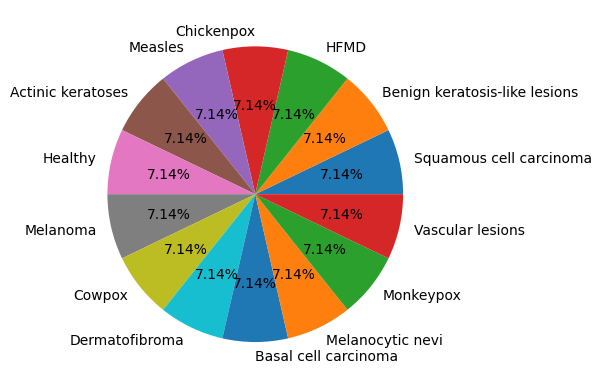

In [18]:
## Show the number of images to show there are no biases in the image set

pie = image_df['Label'].value_counts()
pie.plot(kind='pie', autopct='%1.2f%%')
plt.ylabel('')
plt.show()

## 🖥️ Display Images of the Dataset

Now, we can check whether our image paths have been loaded correctly by plotting a sample of our images. To do that, we can use the `matplotlib` library.

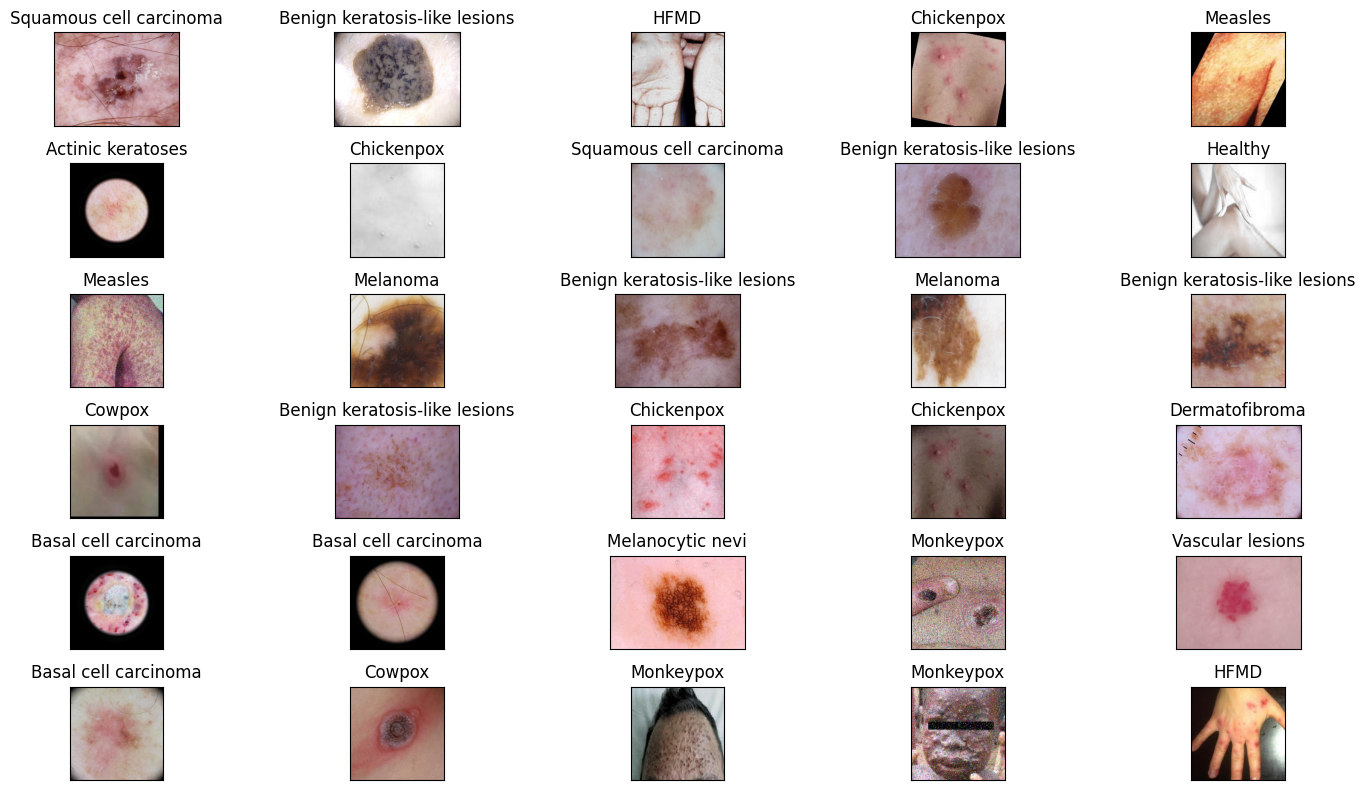

In [16]:
## 🖥️ Display Images of the Dataset

### Define figure and axes
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15,8), subplot_kw={'xticks':[], 'yticks':[]})

### Display 30 images of the dataset
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Path[i], -1))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()